# Homework 6:
# Principal Component Analysis

## Introduction

In this exercise, you will use principal component analysis to find a low-dimensional representation of face images. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize
import scipy.io as scio
import scipy
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

##  Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### 1.1 Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data.

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [3]:
# Load the dataset into the variable X 
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW6\ex6data1.mat'))
X = data['X']

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#plt.style.use('bmh')

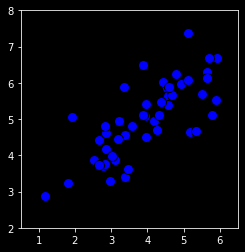

In [5]:
#  Visualize the example dataset
pyplot.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
pyplot.axis([0.5, 6.5, 2, 8])
pyplot.gca().set_aspect('equal')
pyplot.grid(False)

<a id="section3"></a>
### 1.2 Implementing PCA (20 pts)

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: 

1. Compute the covariance matrix of the data.
2. Use SVD (Singular Value Decomposition) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.

First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator. 

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and `numpy` (or `scipy`), you can run SVD with the following command: `U, S, V = np.linalg.svd(Sigma)`, where `U` will contain the principal components and `S` will contain a diagonal matrix. Note that the `scipy` library also has a similar function to compute SVD `scipy.linalg.svd`. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the `scipy` version provides more options and arguments to control SVD computation. 

Complete the code in the following cell to implemente PCA.
<a id="pca"></a>

In [6]:
X.shape

(50, 2)

In [7]:
m, n = X.shape
Sigma = (X.T @ X)/m
Sigma.shape

(2, 2)

In [8]:
import scipy
U, S, V = scipy.linalg.svd(Sigma)

In [9]:
U.shape

(2, 2)

In [10]:
np.cov(X.T).shape

(2, 2)

In [11]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================
    #Sigma is the covariance matrix
    Sigma = (X.T @ X)/m
    U, S, V = scipy.linalg.svd(Sigma)
    
    # ============================================================
    
    
    return U, S

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In the next cell, you need to complete the function feature_normalize to perform this normalization. 

After normalizing the data, you can run PCA to compute the principal components. Your task is to complete the code in the function `pca` to compute the principal components of the dataset. 

In [12]:
np.mean(X, axis= 0)

array([3.98926528, 5.00280585])

In [13]:
X[:2]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ]])

In [14]:
np.std(X, axis= 0)

array([1.16126017, 1.01312201])

In [15]:
def feature_normalize(X):
    
    # ====================== YOUR CODE HERE ======================
    mu = np.mean(X, axis= 0)
    sigma = np.std(X, axis= 0, ddof=1)
    X_norm = (X - mu) / sigma
    
    # ============================================================

    return X_norm, mu, sigma

In [16]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalize(X)
X_norm[:10]

array([[-0.5180535 , -1.57678415],
       [ 0.45915361,  0.83189934],
       [-1.13685138, -0.57729787],
       [-1.04345995, -1.25794647],
       [-0.97413176, -0.80837709],
       [-0.0840487 ,  1.45159638],
       [-0.43771372, -1.3386229 ],
       [ 1.63849222,  1.63958367],
       [-0.05146526,  0.09345323],
       [ 0.48810377,  0.60630127]])

In [17]:
#  Run PCA
U, S = pca(X_norm)
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [18]:
S

array([1.70081977, 0.25918023])

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]


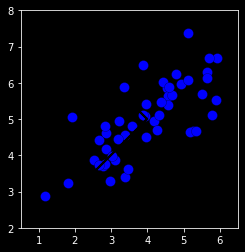

In [19]:
#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))

### 1.3 Dimensionality Reduction with PCA (20 pts)

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

<a id="section4"></a>

#### 1.3.1 Projecting the data onto the principal components (10 pts)

You should now complete the code in the function `projectData`. Specifically, you are given a dataset `X`, the principal components `U`, and the desired number of dimensions to reduce to `K`. You should project each example in `X` onto the top `K` components in `U`. Note that the top `K` components in `U` are given by
the first `K` columns of `U`, that is `Ureduce = U[:, :K]`.
<a id="projectData"></a>

In [20]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================
    Z = X @ U[:, :K] 
    # =============================================================
    return Z

Once you have completed the code in `projectData`, the following cell will project the first example onto the first dimension.

In [21]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

### U is the eigen vector
- Consists of 2 vectors (2 new features that we will use only one of them) , each is a linear combination of 2 old features

In [22]:
X.shape , U[:, :1].shape

((50, 2), (2, 1))

In [23]:
X[0]

array([3.38156267, 3.38911268])

In [24]:
U[:, :1]

array([[-0.70710678],
       [-0.70710678]])

In [25]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
# print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
Z[0]

array([1.48127391])

In [26]:
Z.shape

(50, 1)

In [27]:
Z

array([[ 1.48127391],
       [-0.91291229],
       [ 1.21208656],
       [ 1.62734009],
       [ 1.26042409],
       [-0.96700223],
       [ 1.25605967],
       [-2.31794969],
       [-0.02968998],
       [-0.77386123],
       [-0.62532902],
       [-0.54724542],
       [-0.08878025],
       [-0.520569  ],
       [ 1.548434  ],
       [-1.89684585],
       [-0.87788459],
       [ 0.94646472],
       [-2.30653955],
       [-0.4731351 ],
       [-2.19518524],
       [ 0.38509662],
       [-1.76688508],
       [ 0.0512347 ],
       [ 1.64838858],
       [ 0.5030287 ],
       [-1.2246766 ],
       [-1.16020771],
       [ 0.83375215],
       [-0.00686207],
       [-0.22565101],
       [-1.49788781],
       [ 1.3252858 ],
       [-0.58656923],
       [ 0.67225099],
       [-1.33938187],
       [ 1.67053477],
       [-1.37836539],
       [ 2.53419743],
       [-0.27570789],
       [-0.96695982],
       [ 0.8792732 ],
       [ 1.28362916],
       [-0.97972107],
       [ 1.79450473],
       [-0

### Z should have  k as it's 2nd dimension

- `Z.shape = (50, 1)` 50 new values for 1 new feature that represent 50 values of 2 old features

<a id="section5"></a>
#### 1.3.2 Reconstructing an approximation of the data (10 pts)

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function `recoverData` to project each example in `Z` back onto the original space and return the recovered approximation in `X_rec`.
<a id="recoverData"></a>

In [28]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    
    Instructions
    ------------
    Compute the approximation of the data by projecting back
    onto the original space using the top K eigenvectors in U.
    For the i-th example Z[i,:], the (approximate)
    recovered data for dimension j is given as follows:

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])

    Notice that U[j, :K] is a vector of size K.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== YOUR CODE HERE ======================

    X_rec = Z @ U[:, :K].T
    # X_rec must be (50, 2) exactly like X 
    # Z is (50, 1)
    # U[:, :K].T is (1, 2)
    # =============================================================
    return X_rec

Once you have completed the code in `recoverData`, the following cell will recover an approximation of the first example. The code will then plot the data in this reduced dimension space. This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it. 

In the figure, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$. The dotted lines show the distance from the data points in original space to the projected space. Those dotted lines represent the error measure due to PCA projection.

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


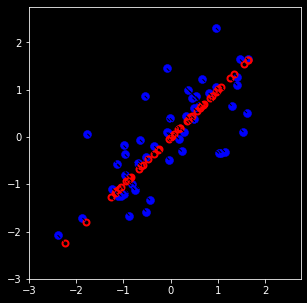

In [29]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
pyplot.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

### 1.4 Face Image Dataset (20 pts)

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex6faces.mat` contains a dataset `X` of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset. Each row of `X` corresponds to one face image (a row vector of length 1024). 

The next cell will load and visualize the first 100 of these face images.

In [30]:
#  Load Face dataset
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW6\ex6faces.mat'))
X = data['X']

In [31]:
def display_data(x):
    (m, n) = x.shape

    # Set example_width automatically if not passed in
    example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)

    # Compute the number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                              pad + display_rows * (example_height + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(x[curr_ex]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          x[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display image
    plt.figure()
    plt.imshow(display_array, cmap='gray', extent=[-1, 1, -1, 1])
    plt.axis('off')

In [32]:
X[0:100].shape

(100, 1024)

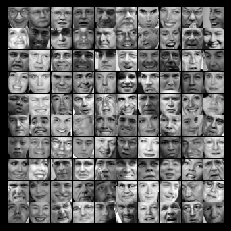

In [33]:
#  Display the first 100 faces in the dataset
display_data(X[0:100])

#### 1.4.1 PCA on Faces (10 pts)

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. 

In the following cell you should first normalize the dataset and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

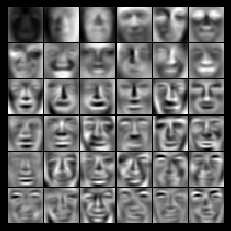

In [34]:
# ====================== YOUR CODE HERE ======================

#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = feature_normalize(X)
    
#  Run PCA
U_face, S_face = pca(X_norm)
    
#  Visualize the top 36 eigenvectors found
display_data(U_face[:, :36].T)

# =============================================================


### The cell above depicts eigenfaces (eigenvectors) which are the direction to project original images on
- Theye are not dimensioanly reduced original images

### Each column in U is a direction of 1024 original features (eigenfaces) 

In [35]:
X_norm.shape , U_face.shape

((5000, 1024), (1024, 1024))

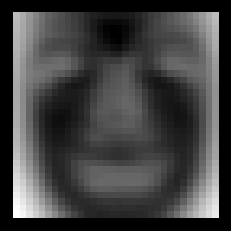

In [36]:
display_data(U_face[:,  :1].T)

In [37]:
U_face[:,0]

array([-0.01425307, -0.01474233, -0.01501482, ..., -0.00895052,
       -0.00769526, -0.00692969])

#### 1.4.2 Dimensionality Reduction (10 pts)

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [38]:
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 

# ====================== YOUR CODE HERE ======================
K = 100
Z = projectData(X_norm, U_face, K)

# =============================================================


print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


In [39]:
Z[0]

array([15.11459505,  4.98880083,  5.77150064,  3.98239495,  1.18731727,
        3.12808688,  1.22390699,  5.73147438, -0.80581173,  1.49340442,
        3.63686729, -1.61246729, -0.88790412, -4.24133011, -1.12657023,
       -0.45979284,  3.51550582,  4.53283759,  0.8898219 , -1.53663389,
       -1.4046884 ,  2.83425718, -2.63826191, -1.81544412, -0.47981212,
       -0.25445964, -3.46525831,  1.53810288,  4.08094649, -0.18147402,
        2.5372266 , -1.02253947,  2.59716174, -0.67489805, -2.02221959,
        1.71743456,  0.72349532, -2.19151865, -2.81574045,  0.07991231,
        0.20797897, -1.62959491, -2.14387441,  0.12940899,  2.21074992,
        1.78661696,  1.91684862,  2.65085321, -2.40695873, -1.67058027,
       -1.79990501, -0.43015578, -0.33698247,  1.14171674, -0.65103408,
        1.93319173,  1.41799113, -0.12505595,  2.14973053,  1.34356879,
       -0.64322121, -0.8019379 , -0.43933014, -0.78571935,  0.84683296,
       -0.57311987,  1.31852594,  0.80750816,  0.56318719, -0.49

In the next cell, an approximate recovery of the data is performed and the original and projected face images
are displayed.

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

In [40]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

# ====================== YOUR CODE HERE ======================
X_rec  = recoverData(Z, U_face, K)
   
# =============================================================

Text(0.5, 0.98, 'Recovered faces')

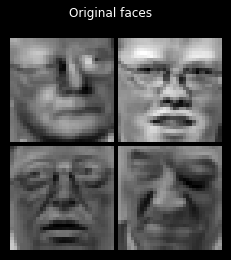

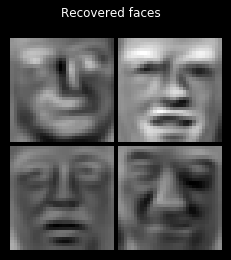

In [41]:
# Display normalized data
display_data(X_norm[1:5, :])
pyplot.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
display_data(X_rec[1:5, :])
pyplot.gcf().suptitle('Recovered faces')

### 1.5 Scikit-learn (40 pts)

In this section, your task is to use Scikit-learn to repeat all the analysis and verify the results above. 

In [42]:
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW6\ex6data1.mat'))
X = data['X']


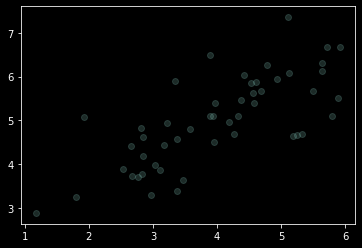

In [43]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

In [44]:
X[:10]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929]])

### There is no y in this dataset, so we don't have anything to predict and therefore, we don't split the data into train and test

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_norm = sc.fit_transform(X)
X_norm[:10]

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677]])

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_pca = pca.fit_transform(X_norm)
X_pca[:10]

array([[ 1.12439593],
       [-0.69296762],
       [ 0.92006291],
       [ 1.23527091],
       [ 0.95675466],
       [-0.73402587],
       [ 0.95344174],
       [-1.75949443],
       [-0.02253688],
       [-0.58741763]])

In [47]:
plt.style.use('dark_background')
plt.style.use('bmh')

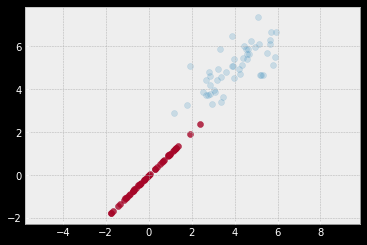

In [48]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca, X_pca, alpha=0.8)
plt.axis('equal');

### Now you can see the 2D data is plotted alongside the reduced dimension data

In [49]:
pca.components_

array([[-0.70710678, -0.70710678]])

In [50]:
pca.components_[0].shape, X_norm[0].shape

((2,), (2,))

In [51]:
pca.components_[0]@X_norm[0]

#pca.components_[1]@X_norm[0]

1.4963126084578515

In [52]:
X_pca[0]

array([1.12439593])

### Reconstruct data

In [53]:
X_rec = X_pca @ pca.components_ 
X_rec[0]

array([-0.79506798, -0.79506798])

In [54]:
X_norm[0]

array([-0.52331306, -1.59279252])

In [55]:
X_rec =  pca.inverse_transform(X_pca)
X_rec[0]

array([-1.05805279, -1.05805279])

## Image Data

In [56]:
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW6\ex6faces.mat'))
X = data['X']

In [57]:
X.shape

(5000, 1024)

### Let's visualize 100 of the original images

Text(0.5, 0.98, 'Original faces')

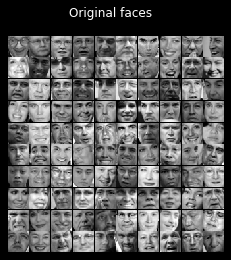

In [58]:
# Display original data
display_data(X[:100, :])
pyplot.gcf().suptitle('Original faces')

`sc = StandardScaler()
X_norm = sc.fit_transform(X)
pca_image =  PCA(n_components=100, whiten=True)
X_pca = pca_image.fit_transform(X_norm)
X_pca.shape`

In [59]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
pipe_pca = make_pipeline( StandardScaler(), PCA(n_components=100, whiten=True) )
X_pca = pipe_pca.fit_transform(X)

In [61]:
X_pca.shape

(5000, 100)

###  Plotting one image and its reduced feature version
- First image is (32, 32)
- second mage is (10, 10)

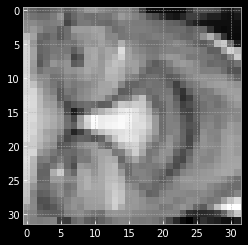

In [62]:
plt.imshow(X[0].reshape(32,32), cmap = 'gray');

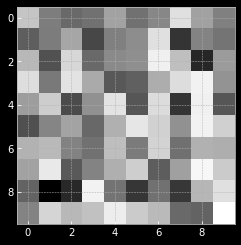

In [63]:

plt.imshow(X_pca[0].reshape(10,10), cmap = 'gray')

In [64]:
pca = pipe_pca['pca']
components = pca.components_
components.shape

(100, 1024)

### Let's visualize 36 most important eigenfaces

In [65]:
pca_reduced = pca.components_[:36]

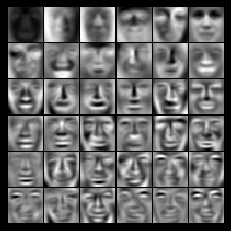

In [66]:
for component in pca_reduced:
    component.reshape(32,32)

display_data(pca_reduced)

### Let's reconstruct the images

In [67]:
X_rec =  pca.inverse_transform(X_pca)
X_rec.shape

(5000, 1024)

Text(0.5, 0.98, 'Recovered faces')

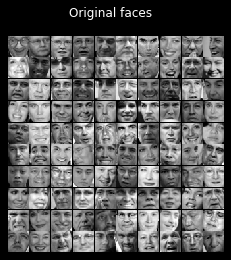

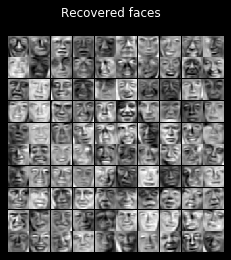

In [68]:
# Display original data
display_data(X[:100, :])
pyplot.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
display_data(X_rec[:100, :])
pyplot.gcf().suptitle('Recovered faces')